# Energy Consumption Trends Analysis
### A Data-Driven Exploration
This notebook explores energy consumption data to uncover key trends, patterns, and insights that can inform sustainability strategies and efficient energy usage.


**Goal:** Analyze patterns and trends in energy consumption data over time.

## 1. Importing Libraries and Loading the Data
We begin by importing the necessary Python libraries and loading the dataset. This step ensures that all required packages are available for data manipulation, analysis, and visualization.

In [0]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Initial Data Exploration
Let's take a first look at the dataset — checking its structure, columns, and sample entries to understand what kind of data we're dealing with.

In [0]:
df = pd.read_csv('/Volumes/workspace/energy_data/energy_data_volume/time_series_60min_singleindex_filtered.csv')
df

,utc_timestamp,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile,DE_50hertz_load_actual_entsoe_transparency,DE_50hertz_load_forecast_entsoe_transparency,DE_50hertz_solar_generation_actual,DE_50hertz_wind_generation_actual,DE_50hertz_wind_offshore_generation_actual,DE_50hertz_wind_onshore_generation_actual,DE_LU_load_actual_entsoe_transparency,DE_LU_load_forecast_entsoe_transparency,DE_LU_price_day_ahead,DE_LU_solar_generation_actual,DE_LU_wind_generation_actual,DE_LU_wind_offshore_generation_actual,DE_LU_wind_onshore_generation_actual,DE_amprion_load_actual_entsoe_transparency,DE_amprion_load_forecast_entsoe_transparency,DE_amprion_solar_generation_actual,DE_amprion_wind_onshore_generation_actual,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059,6839.0,7040.0,NaN,4124.0,48.0,4076.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15163.0,14618.0,NaN,857.0,13841.0,13362.0,NaN,3866.0,469.0,3398.0,5307.0,4703.0,NaN,5.0
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134,6955.0,7040.0,NaN,4280.0,48.0,4232.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14826.0,14353.0,NaN,794.0,13267.0,12858.0,NaN,3974.0,466.0,3508.0,5087.0,4562.0,NaN,7.0
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139,7094.0,7263.0,NaN,4042.0,48.0,3994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14405.0,14098.0,NaN,826.0,12702.0,12611.0,NaN,4194.0,470.0,3724.0,4906.0,4517.0,NaN,8.0
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172,7364.0,7600.0,NaN,3855.0,46.0,3808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14083.0,13953.0,NaN,852.0,12452.0,12490.0,NaN,4446.0,473.0,3973.0,4865.0,4601.0,NaN,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30T19:00:00Z,2020-09-30T21:00:00+0200,57559.0,56708.0,NaN,0.0,NaN,NaN,10654.0,NaN,NaN,4754.0,NaN,NaN,5900.0,NaN,11153.0,11099.0,NaN,778.0,126.0,652.0,58066.0,57176.0,49.92,0.0,10654.0,4754.0,5900.0,21031.0,20991.0,NaN,1526.0,17719.0,17190.0,0.0,8186.0,4628.0,3558.0,7657.0,7428.0,NaN,164.0
50397,2020-09-30T20:00:00Z,2020-09-30T22:00:00+0200,54108.0,53270.0,NaN,0.0,NaN,NaN,11836.0,NaN,NaN,5194.0,NaN,NaN,6642.0,NaN,10561.0,10433.0,NaN,831.0,138.0,692.0,54587.0,53717.0,42.79,0.0,11836.0,5194.0,6642.0,19490.0,19521.0,NaN,1885.0,16984.0,16446.0,0.0,8879.0,5056.0,3824.0,7072.0,6870.0,NaN,242.0
50398,2020-09-30T21:00:00Z,2020-09-30T23:00:00+0200,49845.0,49239.0,NaN,0.0,NaN,NaN,12168.0,NaN,NaN,5339.0,NaN,NaN,6829.0,NaN,9836.0,9648.0,NaN,917.0,174.0,743.0,50290.0,49651.0,35.02,0.0,12168.0,5339.0,6829.0,17995.0,17948.0,NaN,2022.0,15549.0,15256.0,0.0,8972.0,5165.0,3807.0,6465.0,6388.0,NaN,257.0
50399,2020-09-30T22:00:00Z,2020-10-01T00:00:00+0200,4

In [0]:
cols = ['cet_cest_timestamp', 'DE_load_actual_entsoe_transparency','DE_solar_generation_actual','DE_solar_profile','DE_wind_generation_actual','DE_wind_profile']
df = df[cols]

## 3. Data Cleaning and Preparation
Before analysis, we clean the data by handling missing values, fixing data types, and removing inconsistencies. Clean data ensures reliable insights.

<Axes: >

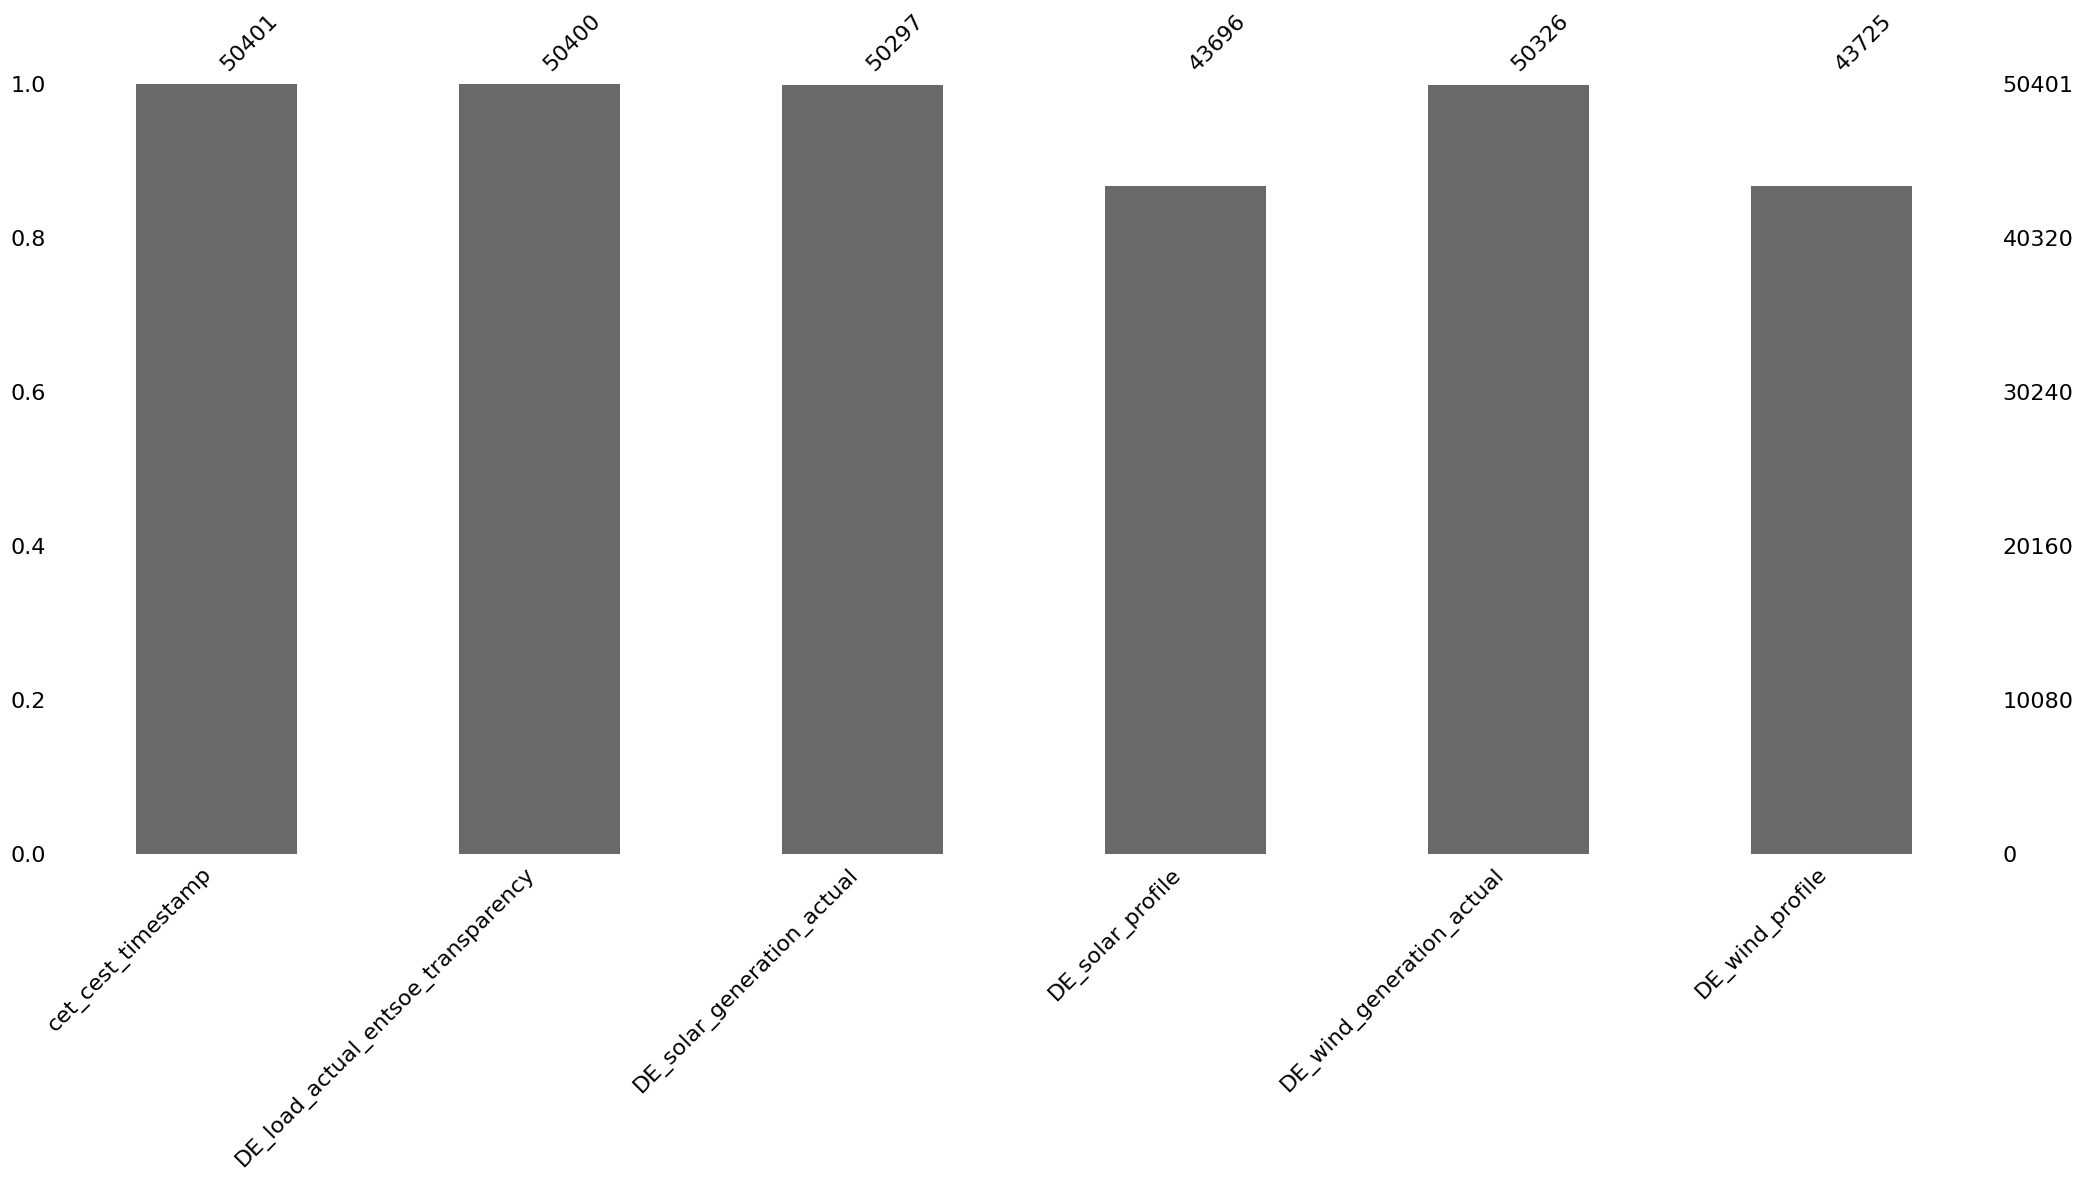

In [0]:
msno.bar(df)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cet_cest_timestamp                  50401 non-null  object 
 1   DE_load_actual_entsoe_transparency  50400 non-null  float64
 2   DE_solar_generation_actual          50297 non-null  float64
 3   DE_solar_profile                    43696 non-null  float64
 4   DE_wind_generation_actual           50326 non-null  float64
 5   DE_wind_profile                     43725 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.3+ MB


In [0]:
df.describe()

,DE_load_actual_entsoe_transparency,DE_solar_generation_actual,DE_solar_profile,DE_wind_generation_actual,DE_wind_profile
count,50400.000000,50297.000000,43696.000000,50326.000000,43725.000000
mean,55492.468552,4566.042905,0.101902,11552.234650,0.278908
std,10015.431042,6940.267590,0.155718,9076.350769,0.211566
min,31307.000000,0.000000,0.000000,135.000000,0.003800
25%,47106.000000,0.000000,0.000000,4506.000000,0.114900
50%,55092.000000,173.000000,0.003000,9015.000000,0.221100
75%,64309.250000,7342.000000,0.162300,16113.750000,0.389300
max,77549.000000,32947.000000,0.687300,46064.000000,1.078000


In [0]:
df.fillna(0, inplace=True)

/home/spark-4f1b0a66-d15a-41c2-8f9b-9c/.ipykernel/5443/command-5036415605482050-4231983114:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [0]:
df['cet_cest_timestamp'] = pd.to_datetime(df['cet_cest_timestamp'], utc=True)
df.set_index('cet_cest_timestamp', inplace=True)

/home/spark-4f1b0a66-d15a-41c2-8f9b-9c/.ipykernel/5443/command-5036415605482055-3389779491:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cet_cest_timestamp'] = pd.to_datetime(df['cet_cest_timestamp'], utc=True)


## 4. Exploratory Data Analysis (EDA)
In this section, we visualize and statistically analyze key trends. We'll examine energy consumption over time, compare categories, and identify patterns or anomalies.

In [0]:
df["renewable_generation"] = df["DE_solar_generation_actual"] + df["DE_wind_generation_actual"]

/home/spark-4f1b0a66-d15a-41c2-8f9b-9c/.ipykernel/5443/command-5036415605482051-1664948647:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["renewable_generation"] = df["DE_solar_generation_actual"] + df["DE_wind_generation_actual"]


In [0]:
df["renewable_share"] = (df["renewable_generation"] / df["DE_load_actual_entsoe_transparency"]) * 100


/home/spark-4f1b0a66-d15a-41c2-8f9b-9c/.ipykernel/5443/command-5036415605482052-3050068823:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["renewable_share"] = (df["renewable_generation"] / df["DE_load_actual_entsoe_transparency"]) * 100


In [0]:
monthly = df['renewable_share'].resample('ME').mean()

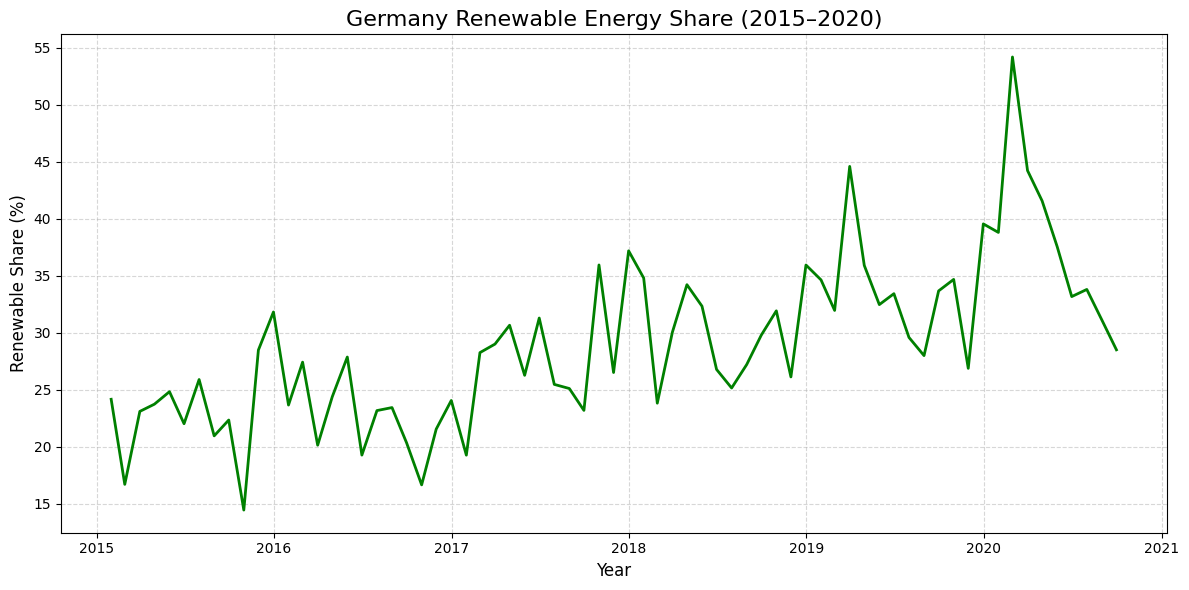

In [0]:
plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly.values, color='green', linewidth=2)
plt.title('Germany Renewable Energy Share (2015–2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Renewable Share (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From the above chart shows the monthly share of renewable energy in Germany’s electricity generation from 2015 to 2020. Overall, the amount of energy from renewables—mainly wind and solar—has gradually increased over time.

In 2015 and 2016, the renewable share was around 15–30% and changed only moderately from month to month. From 2017 onwards, the share became more variable but continued to grow, reaching over 50% in early 2020. This high point may be due to good weather for wind and solar, as well as lower electricity use during the first months of the COVID-19 pandemic.

Even with short-term drops, the overall trend shows that Germany has made significant progress in using renewable energy, following its Energiewende (energy transition) policies.

In [0]:
monthly_solar = df['DE_solar_generation_actual'].resample('ME').mean()
monthly_wind = df['DE_wind_generation_actual'].resample('ME').mean()
monthly_load = df['DE_load_actual_entsoe_transparency'].resample('ME').mean()

In [0]:
monthly_solar_pct = (monthly_solar/monthly_load) * 100
monthly_wind_pct = (monthly_wind/monthly_load) * 100

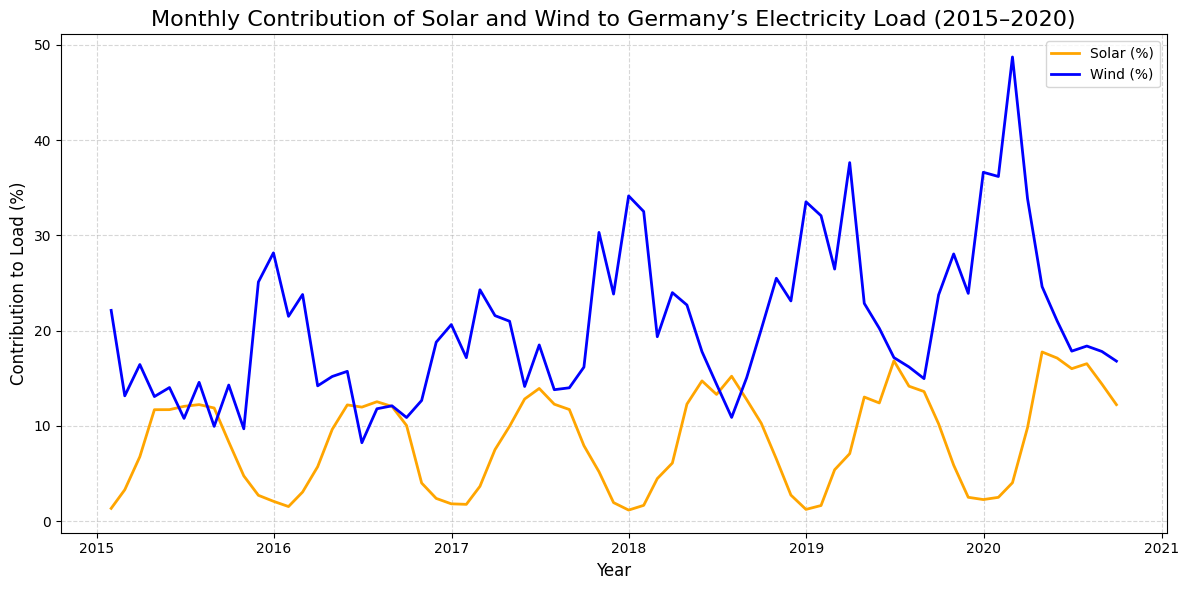

In [0]:
plt.figure(figsize=(12,6))
plt.plot(monthly_solar_pct.index, monthly_solar_pct.values, label='Solar (%)', color='orange', linewidth=2)
plt.plot(monthly_wind_pct.index, monthly_wind_pct.values, label='Wind (%)', color='blue', linewidth=2)
plt.title('Monthly Contribution of Solar and Wind to Germany’s Electricity Load (2015–2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Contribution to Load (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Analysis of Solar and Wind Power in Germany (2015–2020)

The above chart shows the monthly contributions of solar and wind power to Germany’s total electricity demand from 2015 to 2020. The blue line represents wind energy, and the orange line represents solar energy. During this time, wind contributed a larger share of electricity than solar this shows Germany has invested heavily in wind farms, both in onshore and offshore wind infrastructure. Solar power follows a clear seasonal pattern, with high production in summer and very little in winter due to changes in sunlight. Wind power varies more throughout the year and was especially strong in late 2019 and early 2020, likely because of stormy weather. Overall, both energy sources have become more important for Germany’s electricity supply, showing progress toward a cleaner, low-carbon energy system.

/home/spark-4f1b0a66-d15a-41c2-8f9b-9c/.ipykernel/5443/command-5036415605482063-4207928301:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.index.year
/home/spark-4f1b0a66-d15a-41c2-8f9b-9c/.ipykernel/5443/command-5036415605482063-4207928301:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.index.month


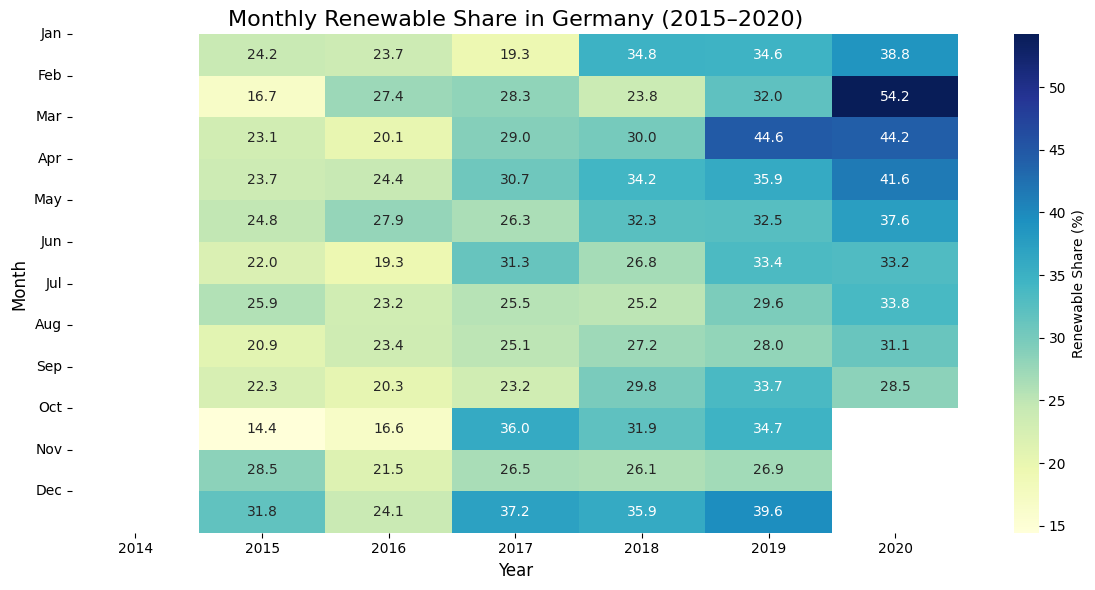

In [0]:
df['Year'] = df.index.year
df['Month'] = df.index.month

monthly_avg = df.groupby(['Year', 'Month'])['renewable_share'].mean().unstack(level=0)

plt.figure(figsize=(12,6))
sns.heatmap(monthly_avg, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Renewable Share (%)'})
plt.title('Monthly Renewable Share in Germany (2015–2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.yticks(ticks=range(0,12), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.tight_layout()
plt.show()

#### Analysis of Renewable Energy Heatmap (2015–2020)

The heatmap shows the average monthly share of renewable energy in Germany’s total electricity generation from 2015 to 2020. Each cell represents how much of the electricity came from renewables—mainly wind and solar—in a specific month and year. The chart shows clear seasonal and yearly patterns. Renewable energy shares are usually higher in winter and early spring (especially from February to April) because of stronger winds, while summer months have steady solar power. Over the years, the share of renewables has increased, reaching more than 50% in February 2020. This steady rise shows Germany’s progress toward cleaner energy and how renewable generation changes with the seasons.

## Conclusion

This analysis shows that Germany made strong progress in using renewable energy—mainly wind and solar—for its electricity between 2015 and 2020. The share of renewables steadily increased, sometimes going above 50% of total electricity generation. This growth came from steady investment in clean energy and supportive government policies. Clear seasonal patterns appear: wind power is stronger in winter, while solar peaks in summer.

It’s important to note that the dataset ends in 2020, so it does not include more recent trends up to 2025. Future data could show how Germany’s renewable energy share has changed since then, especially with new policies and technologies. Overall, the findings highlight the success of Germany’s Energiewende (energy transition) while showing the need for continued improvements in grid flexibility, energy storage, and reliability as renewables grow further.